#Task A. 
###Ignore the text (reviews) and run a classification model with the numeric data (you can use standard methods like logistic regression, k-nearest neighbors or anything else). What is the best accuracy of your model?

In [1]:
import pandas as pd
from patsy import dmatrices
from sklearn.cross_validation import train_test_split

from sklearn import metrics
import numpy.random as npr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### create the target column for the dataframe

array(['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',
       'Mexican', 'Thai', 'Vietnamese', 'Others', 'target'], dtype=object)

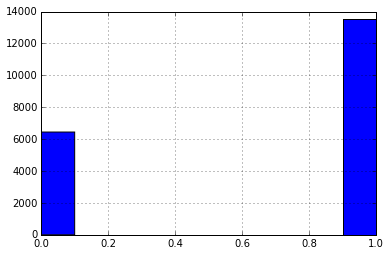

In [2]:
# load the dataset
df = pd.read_csv('yelp.csv')
# drop the review column
df = df.drop(['Review'], axis = 1)
# create a dummy variable for stars
df['target'] = df['stars'] > 3
df['target'].hist()
df = df.drop(['stars'], axis = 1)
df.columns.values

### create X and y values and split between train and test dataset

In [3]:
formula = 'target ~ 0 + votes_cool + votes_funny + votes_useful + Cheap + Moderate + Expensive + VeryExpensive + \
           American + Chinese + French + Japanese + Indian + Italian + Greek + Mediterranean + Mexican + Thai + \
           Vietnamese + Others'
Y, X = dmatrices(formula, df, return_type='dataframe') 
y = Y['target[True]']
# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

# resample from the low rates because we have fewer low rates records
n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X.ix[index_high]
high_y = y[index_high]
low_X = X.ix[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [4]:
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

model_list = [('Naive Bayes', naive_bayes.MultinomialNB()), 
              ('K-nn', neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', p = 2)),
              ('logistic regression', LogisticRegression()),
              ('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)), 
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]


In [5]:
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting Naive Bayes
Fitting K-nn
Fitting logistic regression
Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


,Test Accuracy,Training Accuracy
Bagging,0.667667,0.731195
Decision Tree,0.664500,0.734195
Gradient Boosting,0.691333,0.703336
K-nn,0.614167,0.656547
Naive Bayes,0.679500,0.677620
Random Forest,0.670333,0.731124
logistic regression,0.685000,0.684977


In [6]:
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_new_train, y_new_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_new_train)
    accuracy_train[name] = metrics.accuracy_score(y_new_train, prediction_train) 
    prediction_test = model.predict(X_new_test)
    accuracy_test[name] = metrics.accuracy_score(y_new_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting Naive Bayes
Fitting K-nn
Fitting logistic regression
Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


,Test Accuracy,Training Accuracy
Bagging,0.599361,0.653210
Decision Tree,0.600713,0.656425
Gradient Boosting,0.585465,0.617108
K-nn,0.573168,0.598451
Naive Bayes,0.564560,0.566617
Random Forest,0.598992,0.652841
logistic regression,0.567634,0.580742


### From 300 samples, we can see that highest result come from bagging, the highest accuracy is about 76%

# Task B
###Perform a supervised classification on a subset of the corpus using the reviews only. You can write your code in Python or R. What accuracy do you get from this text mining exercise?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('yelp.csv')
review = [r.decode('ascii', 'ignore') for r in df['Review']]
y = df['stars'] > 3
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(review)
X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X[index_high]
high_y = y[index_high]
low_X = X[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [9]:
model_list = [('Naive Bayes', naive_bayes.MultinomialNB()), 
              ('logistic regression', LogisticRegression())]

for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.843500,0.899636
logistic regression,0.844167,0.980713


In [10]:
print "Fitting all models after resampling"
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_new_train, y_new_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_new_train)
    accuracy_train[name] = metrics.accuracy_score(y_new_train, prediction_train) 
    prediction_test = model.predict(X_new_test)
    accuracy_test[name] = metrics.accuracy_score(y_new_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting all models after resampling
Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.853296,0.895436
logistic regression,0.893630,0.984136


# Task C
### Combine the numeric data and the text classification model (in task B) to create a “hybrid” model. It is your task to figure out how to do this. Now run this hybrid classification model and compare the results with those in A and B. 

In [12]:
df = pd.read_csv('yelp.csv')
review = [r.decode('ascii', 'ignore') for r in df['Review']]
others = df.drop(['Review', 'stars'], axis = 1)
y = df['stars'] > 3

vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(review)
main_X = X.toarray()
other_X = others.as_matrix()
X = np.concatenate((main_X, other_X), axis=1)
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X[index_high]
high_y = y[index_high]
low_X = X[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [13]:
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.840333,0.896564
logistic regression,0.845333,0.981142


In [14]:
print "Fitting all models after resampling"
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_new_train, y_new_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_new_train)
    accuracy_train[name] = metrics.accuracy_score(y_new_train, prediction_train) 
    prediction_test = model.predict(X_new_test)
    accuracy_test[name] = metrics.accuracy_score(y_new_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting all models after resampling
Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.852066,0.891641
logistic regression,0.899410,0.984031


# Task D
### Use unsupervised sentiment analysis on the reviews (with SentiStrength or any other tool) and use the sentiment score to predict high/low rating. Compare and contrast the results of tasks B and D. What can you conclude from your analysis?

In [ ]:
import subprocess
import shlex
def RateSentiment(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar SentiStrengthCom.jar stdin sentidata /Users/Ada/Desktop/TextAnalytics/Assignment2/SentStrength_Data_Sept2011/"), stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    stdout_text, stderr_text = p.communicate(sentiString.replace(" ","+"))
    #remove the tab spacing between the positive and negative ratings. e.g. 1    -5 -> 1-5
    stdout_text = stdout_text.rstrip().replace("\t","")
    positive = int(stdout_text[0])
    negative = int(stdout_text[-1])
    total = positive - negative
    return positive, negative, total

print RateSentiment('love you')

df = pd.read_csv('sample.csv')
review = df['Review']

RateSentiment(review[3])

In [ ]:
scores = [RateSentiment(r) for r in review]
X_sum = [c for (a, b, c) in scores]
X_sum[:10]

In [ ]:
y = df['stars'] > 3
X = pd.DataFrame(X_sum)
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X.ix[index_high]
high_y = y[index_high]
low_X = X.ix[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [ ]:
for (name, model) in model_list[1:]: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list[1:]:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

In [ ]:
print "Fitting all models after resampling"
for (name, model) in model_list[1:]: 
    print 'Fitting', name
    model.fit(X_new_train, y_new_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list[1:]:
    prediction_train = model.predict(X_new_train)
    accuracy_train[name] = metrics.accuracy_score(y_new_train, prediction_train) 
    prediction_test = model.predict(X_new_test)
    accuracy_test[name] = metrics.accuracy_score(y_new_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

In [ ]:
test = [(a, b) for (a, b, c) in scores]
X = pd.DataFrame(test)
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X.ix[index_high]
high_y = y[index_high]
low_X = X.ix[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [ ]:
print "Fitting with both positive and negative sentimental scores"
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

In [ ]:
print "Fitting all models after resampling"
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_new_train, y_new_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_new_train)
    accuracy_train[name] = metrics.accuracy_score(y_new_train, prediction_train) 
    prediction_test = model.predict(X_new_test)
    accuracy_test[name] = metrics.accuracy_score(y_new_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

The hybrid version actually got lower accuracy than the pure text prediction, at least from 300 samples.

# Task E
### Use unsupervised clustering on the text. Does clustering achieve “good” separation between high and low rated restaurants? How can you explain the result?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans

df = pd.read_csv('yelp.csv')
review = [r.decode('ascii', 'ignore') for r in df['Review']]
y = df['stars'] > 4
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(review)

# Dimention reduction, similar to PCA, choose the first 5 components
svd = TruncatedSVD(n_components = 5, random_state = 2)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X[index_high]
high_y = y[index_high]
low_X = X[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
# X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [ ]:
import math
def cosine(p1, p2):
    numerator = sum([p1[i] * p2[i] for i in range(len(p1))])
    denominator = math.sqrt(sum([a*a for a in p1])) * math.sqrt(sum([b*b for b in p2]))
    cos = numerator / float(denominator)
    return cos


    

In [20]:
from nltk.cluster import KMeansClusterer, cosine_distance
clusterer = KMeansClusterer(2, cosine_distance, repeats=100)
clusters = clusterer.cluster(X, True)

None [[ 0.88882547 -0.43928777  0.07952773  0.08716016 -0.05562368]
 [ 0.59046521  0.39408481 -0.19534897  0.09015685  0.67064038]
 [ 0.80498933 -0.02921724  0.09920451 -0.14959925  0.56472742]
 ..., 
 [ 0.72354625  0.6568264   0.12283658 -0.17178259  0.02149005]
 [ 0.9458513  -0.21672512  0.0196899  -0.12284596 -0.20716351]
 [ 0.63505422  0.17858968  0.23744712 -0.33878908 -0.62741748]]


In [21]:
# print('Clustered:', vectors)
metrics.accuracy_score(y, clusters)

0.61688084404220211

In [22]:
clusters_resample = clusterer.cluster(new_X, True)
metrics.accuracy_score(new_y, clusters_resample)

None [[ 0.92624309  0.10728293  0.21678     0.02418972 -0.28807186]
 [ 0.82954455  0.05633541  0.12262057 -0.14458779  0.52224585]
 [ 0.96668246 -0.23292961 -0.04726275  0.09422988 -0.01248148]
 ..., 
 [ 0.82214436  0.29873822  0.21410073 -0.33081528 -0.28205718]
 [ 0.72354625  0.6568264   0.12283658 -0.17178259  0.02149005]
 [ 0.63505422  0.17858968  0.23744712 -0.33878908 -0.62741748]]


0.59865215979214026

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters=2, random_state=1, max_iter=100, n_init=10)
kmeans.fit(X)
# scatter(X[:,0], X[:,1], c=y.values, cmap = 'gist_ncar')
# scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='gist_ncar')
# scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", s=200, linewidths=5)
prediction = kmeans.labels_
metrics.accuracy_score(y, prediction)
# metrics.adjusted_rand_score(y, prediction) 
# print("Top terms per cluster:")
# order_centroids = km.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(2):
#     print("Cluster %d:" % i)
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind])
#     print()

0.60983049152457625

0.34676733836691837

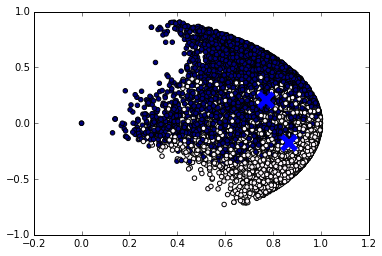

In [24]:
km = MiniBatchKMeans(n_clusters=2, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000)
km.fit(X)
scatter(X[:,0], X[:,1], c=km.labels_, cmap='gist_ncar')
scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="x", s=200, linewidths=5)
prediction = km.labels_
metrics.accuracy_score(y, prediction)
# metrics.adjusted_rand_score(y, prediction) 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters=2, random_state=1, max_iter=100, n_init=10)
kmeans.fit(new_X)
# scatter(new_X[:,0], new_X[:,1], c=new_y, cmap = 'gist_ncar')
scatter(new_X[:,0], new_X[:,1], c=kmeans.labels_, cmap='gist_ncar')
scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", s=200, linewidths=5)
prediction = kmeans.labels_
metrics.accuracy_score(new_y, prediction)
# metrics.adjusted_rand_score(new_y, prediction) 
# print("Top terms per cluster:")
# order_centroids = km.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(2):
#     print("Cluster %d:" % i)
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind])
#     print()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans

df = pd.read_csv('yelp.csv')
review = df['Review']
y = df['stars'] > 3
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(review)
# X = X.toarray()
# Dimention reduction, similar to PCA, choose the first 5 components
svd = TruncatedSVD(n_components = 1000, random_state = 1)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity='cosine')
aggC.fit(X)
scatter(X[:,0], X[:,1], c=aggC.labels_, cmap='gist_ncar')
# scatter(aggC.cluster_centers_[:,0], aggC.cluster_centers_[:,1], marker="x", s=200, linewidths=5)
prediction = aggC.labels_
metrics.accuracy_score(y, prediction)
# metrics.adjusted_rand_score(y, prediction)  

In [ ]:
print "a"